<a href="https://colab.research.google.com/github/Savith-02/notebooks/blob/main/rnn_intent_classifier_BERT.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# import torch
# from transformers import BertTokenizer, BertForSequenceClassification
# from torch.utils.data import DataLoader, Dataset
# from sklearn.model_selection import train_test_split

In [2]:
# def read_dataset(file_path):
#     data = []
#     with open(file_path, 'r') as file:
#         for line in file:
#             intent, sentence = line.strip().split(',')
#             data.append((intent.strip(), sentence.strip()))
#     return data

# file_path = "drive/MyDrive/Code/rawData/data_small.txt"
# dataset = read_dataset(file_path)[1:]
# print(dataset[:5])
# texts = [text for label, text in dataset]
# labels = [label for label, text in dataset]

# print(texts[:5], labels[:5])
# # Example dataset
# # texts = ["This is a good movie", "This is a bad movie", "I love this film", "I hate this film"]
# # labels = [1, 0, 1, 0]

[('Greet', 'Hi'), ('Greet', 'Hello'), ('Greet', 'Hey there'), ('Greet', 'Good morning'), ('Greet', 'Howdy')]
['Hi', 'Hello', 'Hey there', 'Good morning', 'Howdy'] ['Greet', 'Greet', 'Greet', 'Greet', 'Greet']


In [3]:
# print(len(texts))

365


In [4]:
# all_intents = set(intent for intent, _ in dataset[1:])
# intent_to_index = {intent: i for i, intent in enumerate(all_intents)}
# index_to_intent = {intent: i for i, intent in intent_to_index.items()}
# labels = list(map(lambda x: intent_to_index[x], labels))

In [5]:
# all_intents

{'Complaint',
 'Farewell',
 'Feedback',
 'Greet',
 'Inquiry',
 'Navigation',
 'Request'}

In [6]:
# indexes = set(index for index in labels)
# print(f"All unique index count: {len(indexes)}")

All unique index count: 7


In [9]:
# # Data Augmentation (Synonym Replacement)
# def synonym_replacement(sentence):
#     words = sentence.split()
#     new_sentence = sentence
#     for word in words:
#         # Replace with a synonym (simple example, replace 'good' with 'nice')
#         if word == "good":
#             new_sentence = new_sentence.replace("good", "nice")
#     return new_sentence

# augmented_texts = [synonym_replacement(text) for text in texts]
# texts.extend(augmented_texts)
# labels.extend(labels)

In [ ]:
# tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')
# num_classes = 7  # Update this number based on your dataset

# from torch.nn.utils.rnn import pad_sequence

# class TextDataset(Dataset):
#     def __init__(self, texts, labels):
#         self.texts = texts
#         self.labels = labels

#     def __len__(self):
#         return len(self.texts)

#     def __getitem__(self, idx):
#         text = self.texts[idx]
#         label = self.labels[idx]
#         encoding = tokenizer.encode_plus(
#             text,
#             add_special_tokens=True,
#             max_length=64,
#             return_token_type_ids=False,
#             padding='max_length',
#             return_attention_mask=True,
#             return_tensors='pt',
#         )
#         return {
#             'text': text,
#             'input_ids': encoding['input_ids'].flatten(),
#             'attention_mask': encoding['attention_mask'].flatten(),
#             'label': torch.tensor(label, dtype=torch.long)
#         }

#     def collate_fn(batch):
#         input_ids = [item['input_ids'] for item in batch]
#         attention_masks = [item['attention_mask'] for item in batch]
#         labels = [item['label'] for item in batch]

#         padded_input_ids = pad_sequence(input_ids, batch_first=True)
#         padded_attention_masks = pad_sequence(attention_masks, batch_first=True)

#         return {
#             'input_ids': padded_input_ids,
#             'attention_mask': padded_attention_masks,
#             'label': torch.stack(labels)
#         }

# # Split dataset
# train_texts, val_texts, train_labels, val_labels = train_test_split(texts, labels, test_size=0.2, shuffle=True)

# train_dataset = TextDataset(train_texts, train_labels)
# val_dataset = TextDataset(val_texts, val_labels)

# train_loader = DataLoader(train_dataset, batch_size=2, shuffle=True, collate_fn=train_dataset.collate_fn)
# val_loader = DataLoader(val_dataset, batch_size=2, shuffle=False, collate_fn=val_dataset.collate_fn)


In [ ]:
# print(f"Number of samples in training dataset: {len(train_dataset)}")
# print(f"Number of samples in cv dataset: {len(val_dataset)}")

Number of samples in training dataset: 584
Number of samples in cv dataset: 146


In [ ]:
# train_dataset[5]

{'text': 'The product description did not accurately reflect its capabilities.',
 'input_ids': tensor([  101,  1996,  4031,  6412,  2106,  2025, 14125,  8339,  2049,  9859,
          1012,   102,     0,     0,     0,     0,     0,     0,     0,     0,
             0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
             0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
             0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
             0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
             0,     0,     0,     0]),
 'attention_mask': tensor([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
         0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
         0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]),
 'label': tensor(6)}

In [ ]:
# # Model
# # model = BertForSequenceClassification.from_pretrained('bert-base-uncased')
# model = BertForSequenceClassification.from_pretrained('bert-base-uncased', num_labels=num_classes)
# # Training loop (simplified)
# optimizer = torch.optim.Adam(model.parameters(), lr=1e-5)
# model.train()

Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


BertForSequenceClassification(
  (bert): BertModel(
    (embeddings): BertEmbeddings(
      (word_embeddings): Embedding(30522, 768, padding_idx=0)
      (position_embeddings): Embedding(512, 768)
      (token_type_embeddings): Embedding(2, 768)
      (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
      (dropout): Dropout(p=0.1, inplace=False)
    )
    (encoder): BertEncoder(
      (layer): ModuleList(
        (0-11): 12 x BertLayer(
          (attention): BertAttention(
            (self): BertSdpaSelfAttention(
              (query): Linear(in_features=768, out_features=768, bias=True)
              (key): Linear(in_features=768, out_features=768, bias=True)
              (value): Linear(in_features=768, out_features=768, bias=True)
              (dropout): Dropout(p=0.1, inplace=False)
            )
            (output): BertSelfOutput(
              (dense): Linear(in_features=768, out_features=768, bias=True)
              (LayerNorm): LayerNorm((768,), eps=1e

In [ ]:
# for epoch in range(3):  # Number of epochs
#     for batch in train_loader:
#         optimizer.zero_grad()
#         input_ids = batch['input_ids']
#         attention_mask = batch['attention_mask']
#         labels = batch['label']
#         outputs = model(input_ids, attention_mask=attention_mask, labels=labels)
#         loss = outputs.loss
#         loss.backward()
#         optimizer.step()


TypeError: TextDataset.collate_fn() takes 1 positional argument but 2 were given

In [ ]:
# # Validation loop (simplified)
# model.eval()
# correct = 0
# total = 0
# with torch.no_grad():
#     for batch in val_loader:
#         input_ids = batch['input_ids']
#         attention_mask = batch['attention_mask']
#         labels = batch['label']
#         outputs = model(input_ids, attention_mask=attention_mask)
#         _, predicted = torch.max(outputs.logits, 1)
#         total += labels.size(0)
#         correct += (predicted == labels).sum().item()

# print('Validation Accuracy:', correct / total)

In [46]:
def read_dataset(file_path):
    data = []
    with open(file_path, 'r') as file:
        for line in file:
            intent, sentence = line.strip().split(',')
            data.append((intent.strip(), sentence.strip()))
    return data

file_path = "drive/MyDrive/Code/rawData/data_small.txt"
dataset = read_dataset(file_path)[1:]
print(dataset[:5])
texts = [text for label, text in dataset]
labels = [label for label, text in dataset]

print(len(texts))
print(texts[:5], labels[:5])

[('Greet', 'Hi'), ('Greet', 'Hello'), ('Greet', 'Hey there'), ('Greet', 'Good morning'), ('Greet', 'Howdy')]
365
['Hi', 'Hello', 'Hey there', 'Good morning', 'Howdy'] ['Greet', 'Greet', 'Greet', 'Greet', 'Greet']


In [47]:
all_intents = set(intent for intent, _ in dataset[1:])
intent_to_index = {intent: i for i, intent in enumerate(all_intents)}
index_to_intent = {intent: i for i, intent in intent_to_index.items()}
labels = list(map(lambda x: intent_to_index[x], labels))

In [48]:
print(all_intents)

{'Farewell', 'Complaint', 'Request', 'Greet', 'Feedback', 'Navigation', 'Inquiry'}


In [49]:
indexes = set(index for index in labels)
print(f"All unique index count: {len(indexes)}")

All unique index count: 7


In [50]:
import torch
from transformers import BertTokenizer, BertForSequenceClassification
from torch.utils.data import DataLoader, Dataset
from sklearn.model_selection import train_test_split
from torch.nn.utils.rnn import pad_sequence
import torch.nn as nn
import torch.optim as optim
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import matplotlib.pyplot as plt

In [51]:
# # Data Augmentation (Synonym Replacement)
# def synonym_replacement(sentence):
#     words = sentence.split()
#     new_sentence = sentence
#     for word in words:
#         # Replace with a synonym (simple example, replace 'good' with 'nice')
#         if word == "good":
#             new_sentence = new_sentence.replace("good", "nice")
#     return new_sentence

# augmented_texts = [synonym_replacement(text) for text in texts]
# texts.extend(augmented_texts)
# labels.extend(labels)

In [52]:
# Preprocessing with BERT tokenizer
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')

class TextDataset(Dataset):
    def __init__(self, texts, labels):
        self.texts = texts
        self.labels = labels

    def __len__(self):
        return len(self.texts)

    def __getitem__(self, idx):
        text = self.texts[idx]
        label = self.labels[idx]
        encoding = tokenizer.encode_plus(
            text,
            add_special_tokens=True,
            max_length=64,
            return_token_type_ids=False,
            padding='max_length',
            return_attention_mask=True,
            return_tensors='pt',
        )
        return {
            'text': text,
            'input_ids': encoding['input_ids'].flatten(),
            'attention_mask': encoding['attention_mask'].flatten(),
            'label': torch.tensor(label, dtype=torch.long)
        }

    def collate_fn(batch):
        input_ids = [item['input_ids'] for item in batch]
        attention_masks = [item['attention_mask'] for item in batch]
        labels = [item['label'] for item in batch]

        padded_input_ids = pad_sequence(input_ids, batch_first=True)
        padded_attention_masks = pad_sequence(attention_masks, batch_first=True)

        return {
            'input_ids': padded_input_ids,
            'attention_mask': padded_attention_masks,
            'label': torch.stack(labels)
        }

In [53]:
# Split dataset
train_texts, val_texts, train_labels, val_labels = train_test_split(texts, labels, test_size=0.2, shuffle=True)

train_dataset = TextDataset(train_texts, train_labels)
val_dataset = TextDataset(val_texts, val_labels)

train_loader = DataLoader(train_dataset, batch_size=4, shuffle=True, collate_fn=TextDataset.collate_fn)
val_loader = DataLoader(val_dataset, batch_size=4, shuffle=False, collate_fn=TextDataset.collate_fn)

In [54]:
def save_model(model, optimizer, epoch, path='model.pth'):
    state = {
        'epoch': epoch,
        'model_state_dict': model.state_dict(),
        'optimizer_state_dict': optimizer.state_dict(),
    }
    torch.save(state, path)

def load_model(model, optimizer, path='model.pth'):
    checkpoint = torch.load(path)
    model.load_state_dict(checkpoint['model_state_dict'])
    optimizer.load_state_dict(checkpoint['optimizer_state_dict'])
    epoch = checkpoint['epoch']
    return model, optimizer, epoch


In [121]:
model = BertForSequenceClassification.from_pretrained('bert-base-uncased', num_labels=7)

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model.to(device)
optimizer = optim.AdamW(model.parameters(), lr=1e-5, weight_decay=0.01)
criterion = nn.CrossEntropyLoss()

Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [56]:
model, optimizer, start_epoch = load_model(model, optimizer, path='drive/MyDrive/Code/models/BERT_rnn/model.pth')

In [110]:
def train(model, train_loader, optimizer, criterion):
    model.train()
    running_loss = 0.0
    # losses = []
    for batch in train_loader:
        input_ids = batch['input_ids'].to(device)
        attention_mask = batch['attention_mask'].to(device)
        labels = batch['label'].to(device)

        optimizer.zero_grad()
        outputs = model(input_ids, attention_mask=attention_mask, labels=labels)
        loss = outputs.loss
        loss.backward()
        optimizer.step()
        running_loss += loss.item()
        # losses.append(loss.item())
    return running_loss / len(train_loader)

def evaluate(model, val_loader):
    model.eval()
    running_loss = 0.0
    all_preds = []
    all_labels = []
    # losses = []

    with torch.no_grad():
        for batch in val_loader:
            input_ids = batch['input_ids'].to(device)
            attention_mask = batch['attention_mask'].to(device)
            labels = batch['label'].to(device)

            outputs = model(input_ids, attention_mask=attention_mask, labels=labels)
            loss = outputs.loss
            running_loss += loss.item()
            _, preds = torch.max(outputs.logits, dim=1)
            all_preds.extend(preds.cpu().numpy())
            all_labels.extend(labels.cpu().numpy())
            # losses.append(loss.item())
            # print(loss.item())

    accuracy = accuracy_score(all_labels, all_preds)
    precision = precision_score(all_labels, all_preds, average='weighted')
    recall = recall_score(all_labels, all_preds, average='weighted')
    f1 = f1_score(all_labels, all_preds, average='weighted')

    return accuracy, precision, recall, f1, running_loss / len(train_loader)

In [122]:
# Training loop
NUM_EPOCHS = 10
train_losses = []
test_losses = []

for epoch in range(NUM_EPOCHS):
    train_loss = train(model, train_loader, optimizer, criterion)
    save_model(model, optimizer, epoch, path=f'drive/MyDrive/Code/models/BERT_rnn/model.pth')

    test_accuracy, test_precision, test_recall, test_f1, test_loss = evaluate(model, val_loader)
    print(f"Epoch {epoch + 1}/{NUM_EPOCHS}, Train Loss: {train_loss:.4f}, test Loss: {test_loss:.4f},Validation Accuracy: {test_accuracy:.4f}, Validation Precision: {test_precision:.4f}, Validation Recall: {test_recall:.4f}, Validation F1-Score: {test_f1:.4f}")
    # print(f"Epoch {epoch + 1}/{NUM_EPOCHS}, Train Loss: {sum(train_loss) / len(train_loss):.4f}, test Loss: {sum(test_loss) / len(test_loss):.4f},Validation Accuracy: {test_accuracy:.4f}, Validation Precision: {test_precision:.4f}, Validation Recall: {test_recall:.4f}, Validation F1-Score: {test_f1:.4f}")
    train_losses.append(train_loss)
    test_losses.append(test_loss)

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch 1/10, Train Loss: 128.2989, test Loss: 27.0211,Validation Accuracy: 0.6986, Validation Precision: 0.7226, Validation Recall: 0.6986, Validation F1-Score: 0.6554
Epoch 2/10, Train Loss: 88.1981, test Loss: 17.1577,Validation Accuracy: 0.8904, Validation Precision: 0.9061, Validation Recall: 0.8904, Validation F1-Score: 0.8900
Epoch 3/10, Train Loss: 53.4558, test Loss: 10.2467,Validation Accuracy: 0.9452, Validation Precision: 0.9503, Validation Recall: 0.9452, Validation F1-Score: 0.9453
Epoch 4/10, Train Loss: 30.6328, test Loss: 7.2478,Validation Accuracy: 0.9452, Validation Precision: 0.9520, Validation Recall: 0.9452, Validation F1-Score: 0.9435
Epoch 5/10, Train Loss: 17.4306, test Loss: 5.1728,Validation Accuracy: 0.9452, Validation Precision: 0.9503, Validation Recall: 0.9452, Validation F1-Score: 0.9453
Epoch 6/10, Train Loss: 10.5992, test Loss: 4.2633,Validation Accuracy: 0.9315, Validation Precision: 0.9331, Validation Recall: 0.9315, Validation F1-Score: 0.9311
Epoch 

In [123]:
print(train_losses[:2])

[128.29892218112946, 88.19811832904816]


In [124]:
# train_losses = [item for losses in train_losses for item in losses]
# test_losses = [item for losses in test_losses for item in losses]
train_losses = [losses for losses in train_losses]
test_losses = [losses for losses in test_losses]

In [125]:
print(train_losses[:8])
print(test_losses[:8])
print(len(train_losses))
print(len(test_losses))

[128.29892218112946, 88.19811832904816, 53.45578199625015, 30.632836028933525, 17.430643260478973, 10.599153779447079, 7.082788459956646, 5.126089833676815]
[27.02110242843628, 17.157749235630035, 10.24674242734909, 7.247758999466896, 5.172767460346222, 4.263326443731785, 3.9238604120910168, 3.865865845233202]
10
10


[]

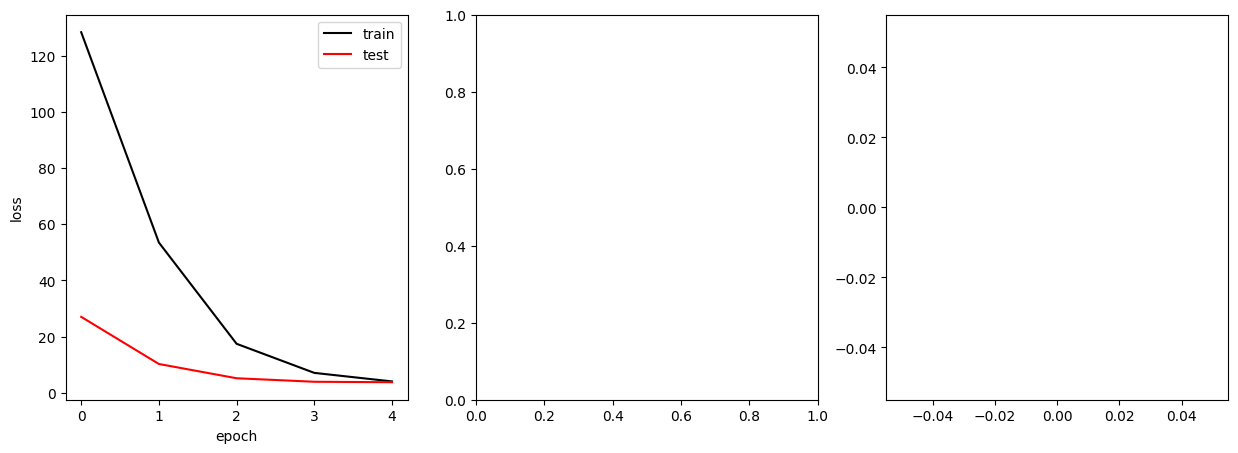

In [126]:
step = 2

fig, (ax1, ax2, ax3) = plt.subplots(1, 3,figsize=(15, 5))
ax1.plot(train_losses[::step], color="black", label="train")
ax1.plot(test_losses[::step], color="red", label="test")
ax1.legend()
ax1.set_ylabel("loss")
ax1.set_xlabel("epoch")

plt.plot()

In [ ]:
def predict_text(text, model, tokenizer, device):
    model.eval()
    inputs = tokenizer(text, return_tensors="pt", padding=True, truncation=True)
    inputs = {key: tensor.to(device) for key, tensor in inputs.items()}  # Move tensors to device
    with torch.no_grad():
        outputs = model(**inputs)
    logits = outputs.logits
    probabilities = torch.softmax(logits, dim=1).tolist()[0]
    predicted_class = torch.argmax(logits, dim=1).item()
    return predicted_class, probabilities

In [91]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
text = "This isnt working right"
predicted_class, probabilities = predict_text(text, model, tokenizer, device)
print("Predicted class:", predicted_class)
print("Class probabilities:", probabilities)
index_to_intent[predicted_class]

Predicted class: 1
Class probabilities: [0.12015555053949356, 0.6171199083328247, 0.03031042031943798, 0.025286497548222542, 0.04624459147453308, 0.09965561330318451, 0.0612274669110775]


'Complaint'